Weird Cases:

One note repeat:
/Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/midi_data/pianos/Angry/TRDGCIZ128F14640CE_5.mid

Scratch sound only:
/Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/midi_data/pianos/Angry/TRVFHPK12903CA720C_0.mid
/Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/midi_data/pianos/Angry/TREBFYV128F92FCE5F_0.mid
/Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/midi_data/pianos/Sadness/TRWWRCD12903D0C838_0.mid

I like (Happiness):
/Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/midi_data/pianos/Happiness/TRAAEEH128E0795DFE_0.mid

# Run Data.py

In [1]:
import os
from Data import Data

In [2]:
DATASET_DIR: str = os.path.abspath(os.path.join("data", "LAKH-MIDI-Dataset-Matched"))
H5_MATCHED_DIR: str = os.path.abspath(os.path.join("data", "LAKH-H5-Matched"))
MIDI_DIR: str = os.path.abspath("midi_data")
MATCH_SCORES_FILEPATH: str = os.path.abspath(os.path.join("data", "match_scores.json"))
GENRE_LIST = ["pop"]
SAMPLE_SIZE: int = 20

POOL_SIZE = 1
PRINT_PLOT = True

START
Exception during processing of TRBOSST128F9331BF6: Error in request for 'Kneedeep feat. Sharlene Hector' - 'Take Me By The Hand Part 1': 'Track not found'
Exception during processing of TRJPWMO128F1464431: Error in request for 'Gerry & The Pacemakers' - 'You'll Never Walk Alone': 'Track not found'
END
Number of tracks: 31034, number of tracks in sample: 20, number of results: 20 (100.00%)
Time: 8.7488637289498


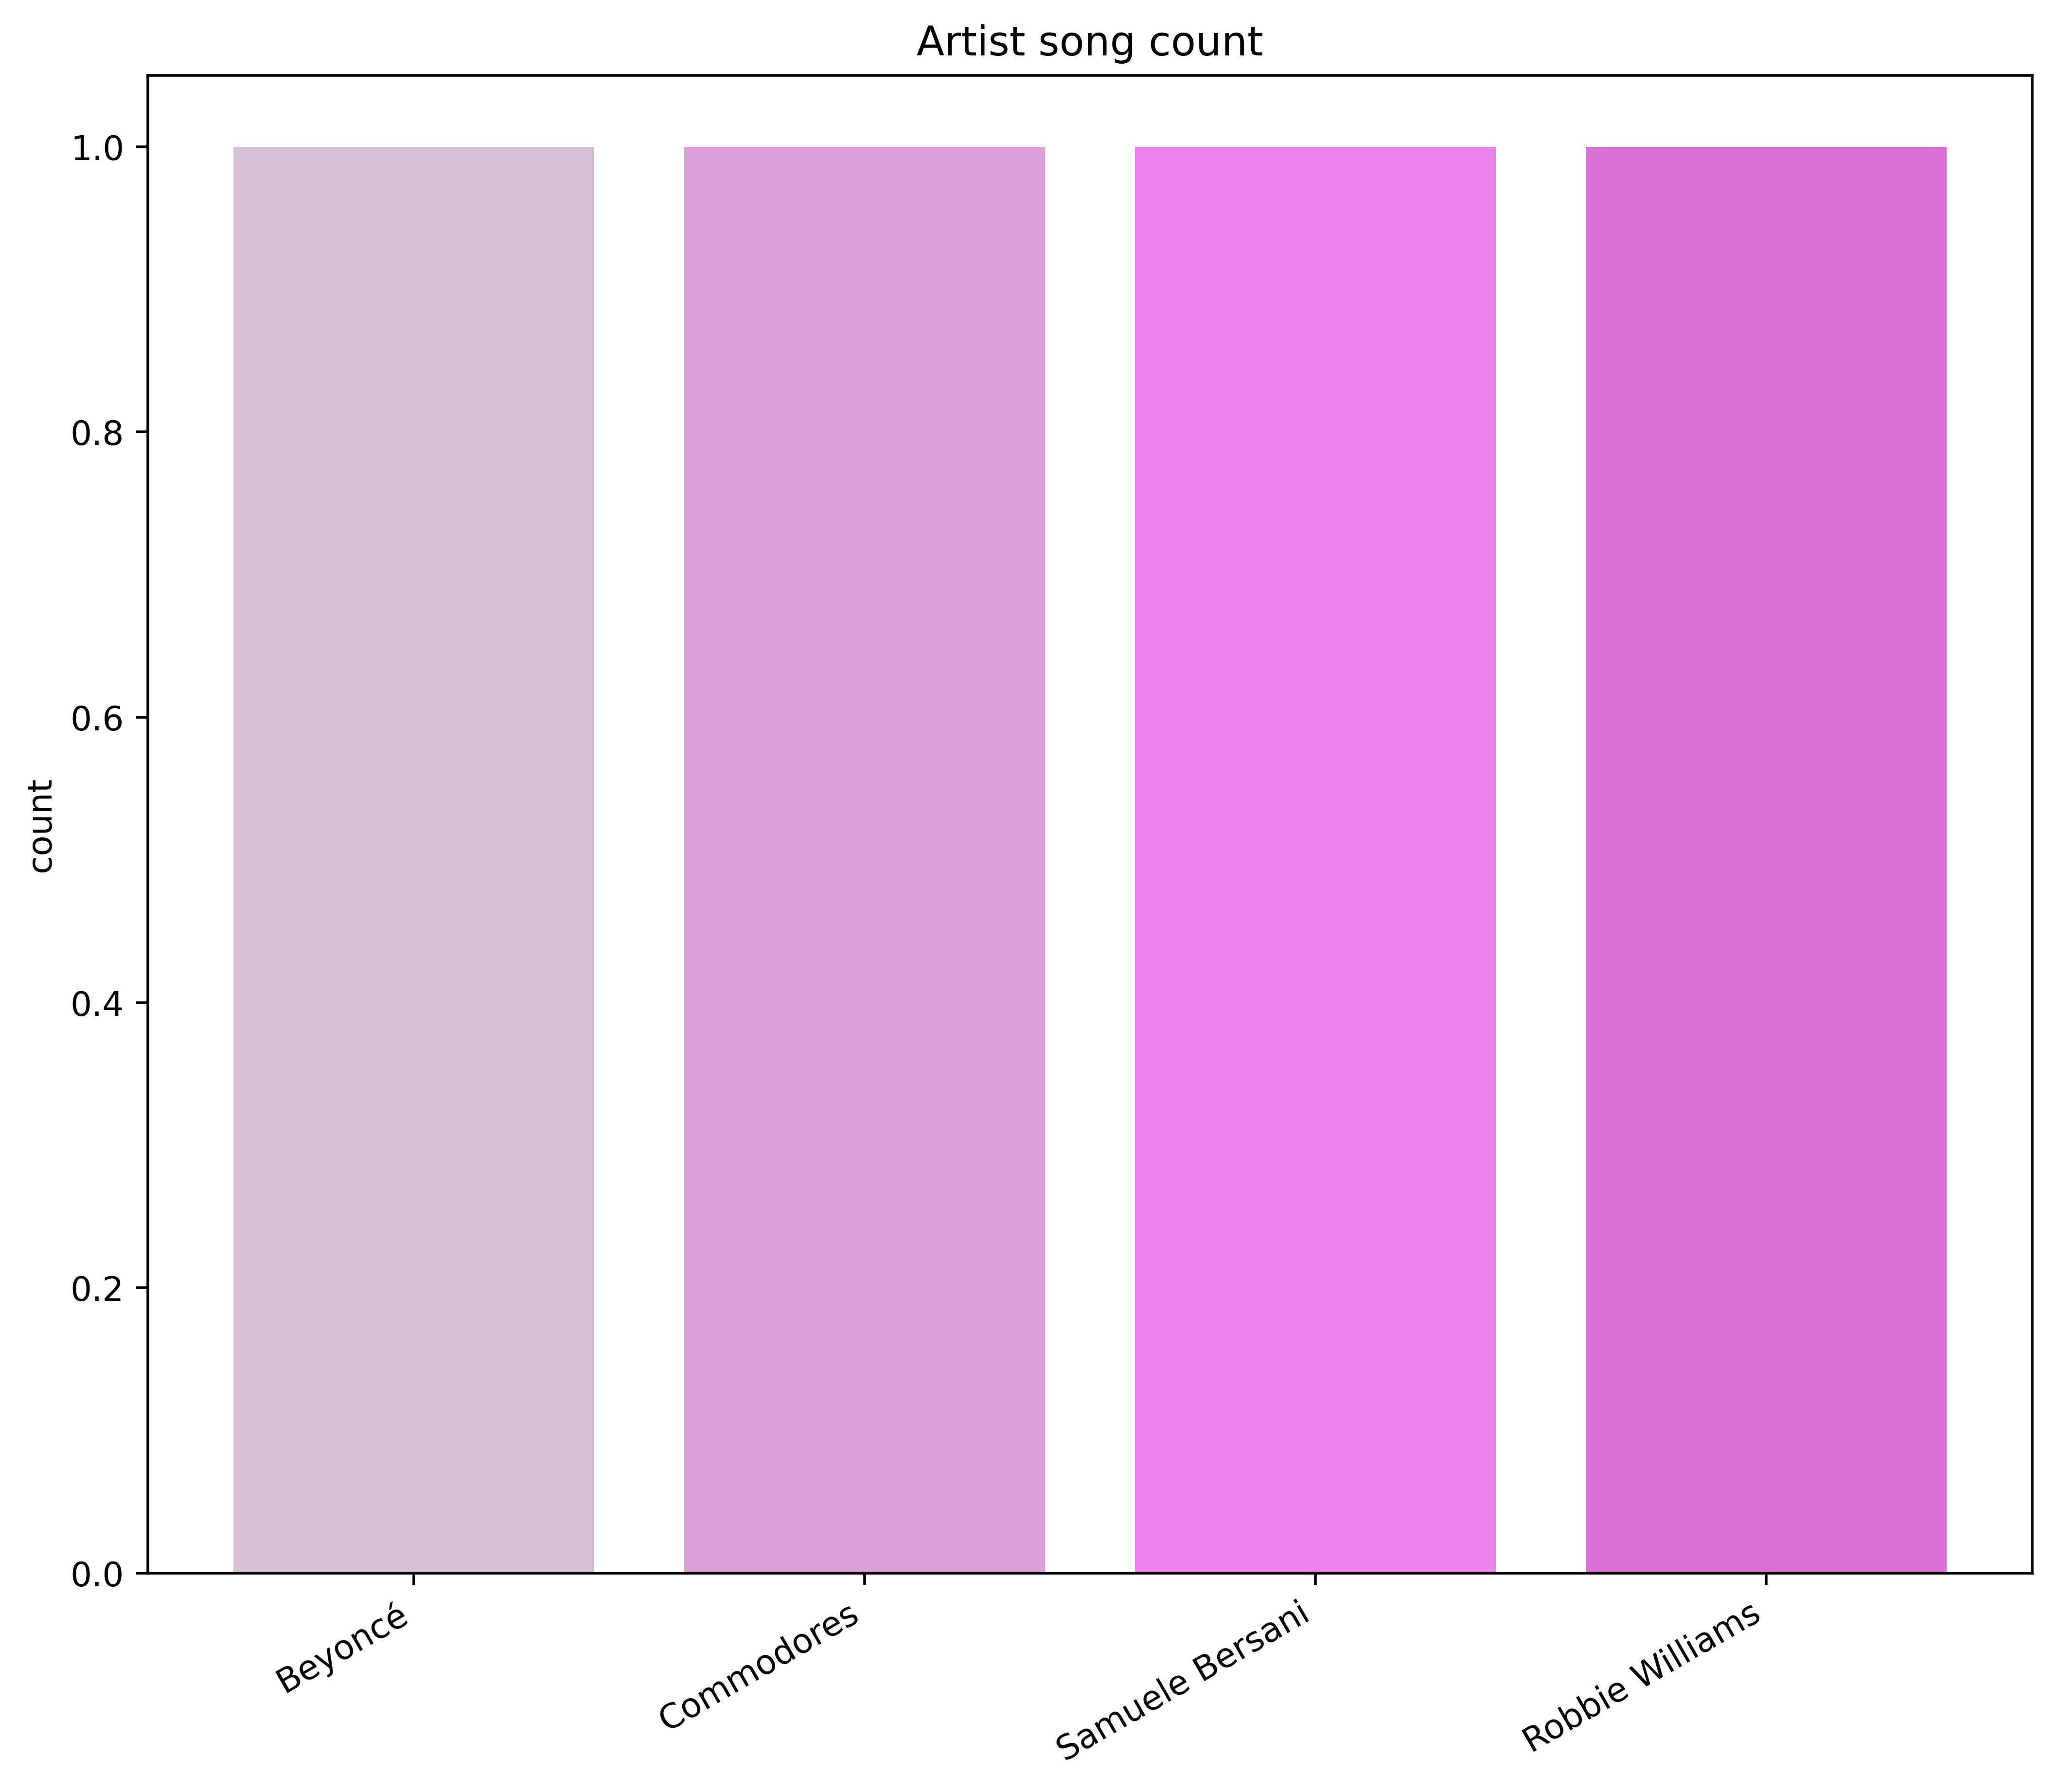

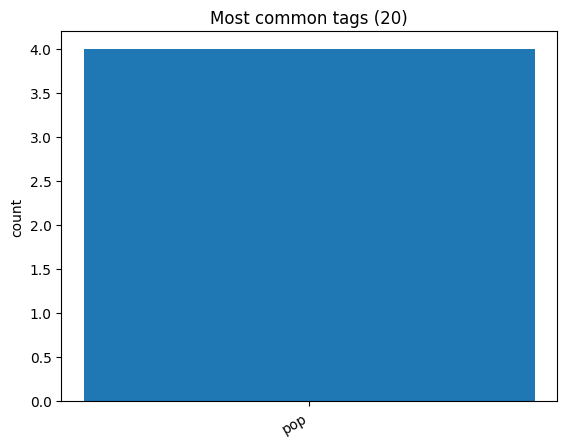

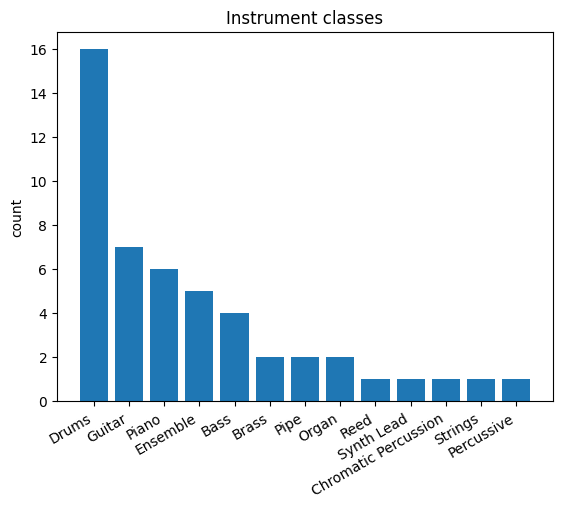

In [3]:
# data = Data(DATASET_DIR, H5_MATCHED_DIR, MIDI_DIR, MATCH_SCORES_FILEPATH, GENRE_LIST, SAMPLE_SIZE)
# data.extract(POOL_SIZE, PRINT_PLOT)

# Split Emotion

In [5]:
import os
import numpy as np
from MEC import MEC_predict, get_MIDI_features, get_info, move_midi_by_emotion
import pretty_midi
from IPython import display

# _SAMPLING_RATE = 16000

# def play_audio(file_path, seconds=30):
#   pm = pretty_midi.PrettyMIDI(file_path)
#   waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
#   # Take a sample of the generated waveform to mitigate kernel resets
#   waveform_short = waveform[:seconds*_SAMPLING_RATE]
#   return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [3]:
model_path = "MEC_model.h5"
midi_folder = "midi_data/ensembles"
unclassified_folder = os.path.join(midi_folder, "unclassified")

emotion_class = ['Happiness', 'Angry', 'Sadness', 'Calmness']

# Get emotion
move_midi_by_emotion(model_path, midi_folder, 1, emotion_class)


# for midi in midi_info:
#     print(f"Emotion = {midi['emotion']}   |   Scale = {midi['scale']}   |   MajMin = {midi['major_minor']}")

Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected


# Generate Primers

In [8]:
import os
import numpy as np
import magenta.music as mm
from pretty_midi import PrettyMIDI
import tensorflow as tf

from GenerateMusic import prepare_primers_midi, generate_music, prepare_primers_midi_from_dir
from Utilities import play_audio, midi_show_notebook

In [10]:
midi_path = os.path.join("midi_data", "pianos", "Angry")
save_dir = os.path.join("primers", "Angry")

primers_midi_paths = prepare_primers_midi_from_dir(midi_path, save_dir, num_of_midi=30, num_of_primers = 50)

Number of primers midi to prepare: 30

New primers midi prepared at /Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/primers/Angry/TRWMGVB128F93068F8_0.mid
New primers midi prepared at /Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/primers/Angry/TRGHIDC128F1495606_0.mid
New primers midi prepared at /Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/primers/Angry/TRDRVKC128E078F298_3.mid
New primers midi prepared at /Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/primers/Angry/TREJUPW128F934B948_2.mid
New primers midi prepared at /Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/primers/Angry/TRBRLWO128F4265309_0.mid
New primers midi prepared at /Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/primers/Angry/TRRVJXU128F428D205_0.mid
New primers m

# Generate Music

In [15]:
model_path = os.path.join("mag_models", "attention_128x128_happiness_full.mag")
# primer_path = primers_midi_paths[3]
primer_path = os.path.abspath(os.path.join("primers", "Happiness", "TRAOBMY12903CAA8DF_0.mid"))


attention_sequence = generate_music(
  model_path,
  "melody_rnn",
  "attention_rnn",
  primer_path=primer_path,
  total_length_steps=70,
  temperature=0.9,
  show_plot=False
)

INFO:tensorflow:Restoring parameters from /var/folders/bn/n488fsxn7ndc1kw3hf1k47000000gn/T/tmpjvl30tpn/model.ckpt
Primer time: [0, 9.21685025]
Generation time: [9.21685025, 28.0361375]
INFO:tensorflow:Beam search yields sequence with log-likelihood: -181.281860 
Generated plot file: /Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/midi_plot/melody_rnn_attention_rnn_2023-03-24_182321.html


In [16]:
attention_pretty_midi = mm.midi_io.note_sequence_to_pretty_midi(attention_sequence)
play_audio(attention_pretty_midi)

fluidsynth: error: Unknown integer parameter 'synth.sample-rate'


In [13]:
model_path = os.path.join("mag_models", "angry_baseline_attention_model_1.mag")
# primer_path = primers_midi_paths[3]
primer_path = os.path.abspath(os.path.join("primers", "Angry", "TROPPCQ128F92FCB61_8.mid"))


attention_sequence = generate_music(
  model_path,
  "melody_rnn",
  "attention_rnn",
  primer_path=primer_path,
  total_length_steps=70,
  temperature=1,
  show_plot=False
)

INFO:tensorflow:Restoring parameters from /var/folders/bn/n488fsxn7ndc1kw3hf1k47000000gn/T/tmp5h545cvu/model.ckpt
Primer time: [0, 0.2054655]
Generation time: [0.2054655, 69.0]
INFO:tensorflow:Beam search yields sequence with log-likelihood: -160.822357 
Generated plot file: /Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/midi_plot/melody_rnn_attention_rnn_2023-03-24_175126.html


In [14]:
attention_pretty_midi = mm.midi_io.note_sequence_to_pretty_midi(attention_sequence)
play_audio(attention_pretty_midi)

fluidsynth: error: Unknown integer parameter 'synth.sample-rate'


# Spotipy

In [6]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data

client_id = '30640558229a45cdbb0524ba51dbfef2'
client_secret = '98d94144440347bb9dfeb4c0e169c33a'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [21]:
name = "idk" #chosen artist
result = sp.search(name) #search query
track = result['tracks']['items'][0]

artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
album = sp.album(track["album"]["external_urls"]["spotify"])


print("artist genres:", artist["genres"])
print("album genres:", album["genres"])

print(artist["genres"] + ['hi'])

artist genres: ['alt z', 'pop']
album genres: []
['alt z', 'pop', 'hi']


In [13]:
path = "/Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/midi_data/ensembles/Calmness/TRCHKNE128F92DAE00_0.mid"
md  = PrettyMIDI(path)
play_audio(md)

fluidsynth: error: Unknown integer parameter 'synth.sample-rate'
